In [410]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [411]:
pd.__version__

'1.5.3'

In [412]:
car_price = pd.read_csv(r'C:/Users/pc/Documents/car_price.csv')

In [413]:
car_price.shape

(11914, 16)

In [414]:
car_price.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [415]:
features = ['MSRP',
            'Make',
            'Model',
            'Year',
            'Engine HP',
            'Engine Cylinders',
            'Transmission Type',
            'Vehicle Style',
            'highway MPG',
            'city mpg']

In [416]:
car_price[features] = car_price[features].astype('string')
for f in features:
    car_price[f] = car_price[f].str.replace(' ', '_').str.lower()

In [417]:
car_price_f = car_price[features]

In [418]:
nulls_rows = car_price_f.isnull().any(axis=1)

In [419]:
car_price_f[nulls_rows] = car_price_f[nulls_rows].fillna('0')

C:\Users\pc\AppData\Local\Temp\ipykernel_17080\2057292027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_price_f[nulls_rows] = car_price_f[nulls_rows].fillna('0')


In [420]:
car_price_f = car_price_f.rename(str.lower, axis='columns').rename(columns={'msrp' : 'price'})

In [421]:
#Q1

In [422]:
car_price_f['transmission type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission type, dtype: Int64

In [423]:
#automatic           

In [424]:
#Q2

In [425]:
car_price_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   price              11914 non-null  string
 1   make               11914 non-null  string
 2   model              11914 non-null  string
 3   year               11914 non-null  string
 4   engine hp          11914 non-null  string
 5   engine cylinders   11914 non-null  string
 6   transmission type  11914 non-null  string
 7   vehicle style      11914 non-null  string
 8   highway mpg        11914 non-null  string
 9   city mpg           11914 non-null  string
dtypes: string(10)
memory usage: 930.9 KB


In [426]:
numerical_features = ['price', 'year', 'engine hp', 'engine cylinders','highway mpg', 'city mpg']

In [427]:
car_price_f[numerical_features] = car_price_f[numerical_features].astype(float)

In [428]:
categorical_features = car_price_f.select_dtypes('string').astype('category').columns

C:\Users\pc\AppData\Local\Temp\ipykernel_17080\815563676.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_price_f.corr(), cmap='coolwarm', annot=True)


<Axes: >

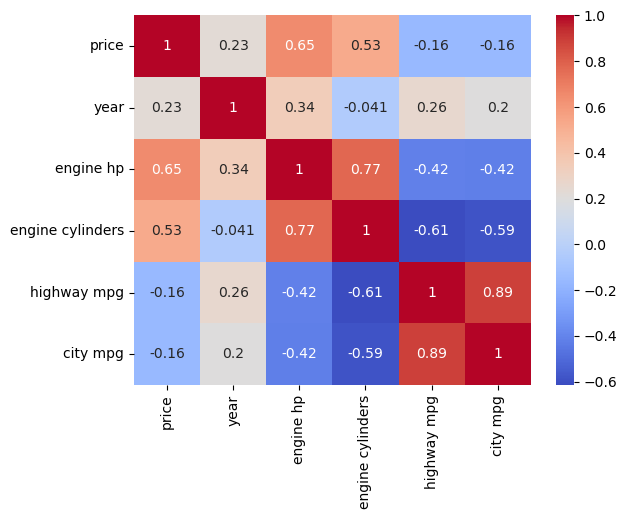

In [429]:
sns.heatmap(car_price_f.corr(), cmap='coolwarm', annot=True)

In [430]:
m = car_price_f.price.mean()

car_price_f['above_average'] = (car_price_f['price'] >= m).astype(int)

In [431]:
# highway mpg and city mpg

In [432]:
#Q3

In [433]:
from sklearn.metrics import mutual_info_score
def mscore(series):
    return mutual_info_score(car_price_f['above_average'], car_price_f[series])

for c in car_price_f.columns:
    print(f' {c} \t : { mscore(c) }')

 price 	 : 0.5875697786262447
 make 	 : 0.23773108100965473
 model 	 : 0.4574691996326542
 year 	 : 0.07339035085054221
 engine hp 	 : 0.3616820149158955
 engine cylinders 	 : 0.11456476603798421
 transmission type 	 : 0.01995386887695643
 vehicle style 	 : 0.08263330137961424
 highway mpg 	 : 0.04298955749030491
 city mpg 	 : 0.05818701779786887
 above_average 	 : 0.5875697786262442


In [436]:
car_price_f.drop(columns='above_average')

,price,make,model,year,engine hp,engine cylinders,transmission type,vehicle style,highway mpg,city mpg
0,46135.0,bmw,1_series_m,2011.0,335.0,6.0,manual,coupe,26.0,19.0
1,40650.0,bmw,1_series,2011.0,300.0,6.0,manual,convertible,28.0,19.0
2,36350.0,bmw,1_series,2011.0,300.0,6.0,manual,coupe,28.0,20.0
3,29450.0,bmw,1_series,2011.0,230.0,6.0,manual,coupe,28.0,18.0
4,34500.0,bmw,1_series,2011.0,230.0,6.0,manual,convertible,28.0,18.0
...,...,...,...,...,...,...,...,...,...,...
11909,46120.0,acura,zdx,2012.0,300.0,6.0,automatic,4dr_hatchback,23.0,16.0
11910,56670.0,acura,zdx,2012.0,300.0,6.0,automatic,4dr_hatchback,23.0,16.0
11911,50620.0,acura,zdx,2012.0,300.0,6.0,automatic,4dr_hatchback,23.0,16.0
11912,50920.0,acura,zdx,2013.0,300.0,6.0,automatic,4dr_hatchback,23.0,16.0


In [437]:
df_to_enc = car_price_f.drop(columns='above_average')

In [438]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_to_enc.to_dict(orient='records')
dic_enc_fit = dv.fit(train_dict)

In [439]:
dic_enc = dv.transform(train_dict)

In [440]:
df_enc = pd.DataFrame(dic_enc, columns=dic_enc_fit.get_feature_names_out())

In [441]:
from sklearn.model_selection import train_test_split

X = df_enc.copy()
y = car_price_f['above_average']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, train_size=0.6, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

df_full_train, tr = train_test_split(X ,  train_size=0.8, random_state=42)


In [327]:
#Q4

In [332]:
from sklearn.preprocessing import OneHotEncoder

def one_encode(df):
    df = df.copy()
    enc = OneHotEncoder()
    df_enc = enc.fit_transform(df[categorical_features])
    df_encoded = pd.DataFrame(df_enc.toarray(), columns=enc.get_feature_names_out(categorical_features))
    df.reset_index(drop=True, inplace=True)
    df_encoded_f = pd.concat([df[numerical_features], df_encoded], axis=1)
    return df_encoded_f


In [393]:
from sklearn.linear_model import LogisticRegression

#encoded_train = one_encode(X_train)
#encoded_val =  one_encode(X_val)
#encoded_test = one_encode(X_test)

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [394]:
y_pred = model.predict_proba(X_val)[:,1]

In [395]:
above_price = (y_pred >= 0.5)

In [396]:
df_pred = pd.DataFrame()
df_pred['proba'] = y_pred.round(8)
df_pred['prediction'] = above_price.astype(int)
df_pred['actual'] = y_val.values

In [397]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [398]:
df_pred['correct'].mean()

0.9991607217792698

In [399]:
#0.9991607217792698

In [400]:
#Q5

In [401]:
def test_features():
    res_dict = {}
    for f in X_train.columns:
        model.fit(X_train.loc[:, X_train.columns != f] , y_train)
        y_pred = model.predict_proba(X_val)[:,1]
        above_price = (y_pred >= 0.5)
        df_pred = pd.DataFrame()
        df_pred['proba'] = y_pred.round(8)
        df_pred['prediction'] = above_price.astype(int)
        df_pred['actual'] = y_val.values
        df_pred['correct'] = df_pred.prediction == df_pred.actual
        res = df_pred['correct'].mean()
        res_dict.update({ f : res})
    return res_dict

In [402]:
res_dict = {}
for f in X_train.columns:
        model.fit(X_train.loc[:, X_train.columns != f] , y_train)
        y_pred = model.predict_proba(X_val.loc[:, X_val.columns != f])[:,1]
        above_price = (y_pred >= 0.5)
        df_pred = pd.DataFrame()
        df_pred['proba'] = y_pred.round(8)
        df_pred['prediction'] = above_price.astype(int)
        df_pred['actual'] = y_val.values
        df_pred['correct'] = df_pred.prediction == df_pred.actual
        res = df_pred['correct'].mean()
        res_dict.update({ f : res})


In [403]:
selected_values = {}
for key in res_dict:
    if key.startswith("transmission") or key.startswith("engine hp") or key.startswith("year") or key.startswith("city mpg"):
        selected_values.update({key: 1 - res_dict[key]})

selected_values


{'city mpg': 0.0008392782207301552,
 'engine hp': 0.0012589173310952884,
 'transmission type=automated_manual': 0.0008392782207301552,
 'transmission type=automatic': 0.0008392782207301552,
 'transmission type=direct_drive': 0.0008392782207301552,
 'transmission type=manual': 0.0008392782207301552,
 'transmission type=unknown': 0.0008392782207301552,
 'year': 0.061686949223667686}

In [404]:
sorted_selected_values = {k: v for k, v in sorted(selected_values.items(), key=lambda item: item[1])}
sorted_selected_values

{'city mpg': 0.0008392782207301552,
 'transmission type=automated_manual': 0.0008392782207301552,
 'transmission type=automatic': 0.0008392782207301552,
 'transmission type=direct_drive': 0.0008392782207301552,
 'transmission type=manual': 0.0008392782207301552,
 'transmission type=unknown': 0.0008392782207301552,
 'engine hp': 0.0012589173310952884,
 'year': 0.061686949223667686}

In [405]:
#{'city mpg': 0.0008392782207301552,
# 'transmission type_automated_manual': 0.0008392782207301552,
# 'transmission type_automatic': 0.0008392782207301552,
# 'transmission type_direct_drive': 0.0008392782207301552,
# 'transmission type_manual': 0.0008392782207301552,
# 'transmission type_unknown': 0.0008392782207301552,
# 'engine hp': 0.0012589173310952884,
# 'year': 0.061686949223667686}

In [406]:
#Q6

In [407]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [408]:
X_train['price'] = np.log(X_train['price'])

In [409]:
alphas = [0, 0.01, 0.1, 1, 10]

rmse_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, solver='sag', random_state=42)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(round(rmse, 3))
    
rmse_scores

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[7086.316, 7086.288, 7086.035, 7083.503, 7058.276]

In [ ]:
# [0, 0.01, 0.1, 1, 10]
# [2180.382, 2180.364, 2180.2, 2178.558, 2162.235]
# 10

In [328]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = X_train.to_dict(orient='records')
X_train_2 = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val_2 = dv.transform(val_dict)